In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
from MakeSTFTs import *
from Train import *
from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)

Using device=mps
Using sample rate=44100 Hz, FFT=1024 buckets, hop=768 samples, duration=2.0 sec = 114 time steps


In [3]:
# Read all available samples and convert to STFTs
#make_STFTs()

Loaded 930 STFTs from STFTs.pkl
Using 100 STFTs


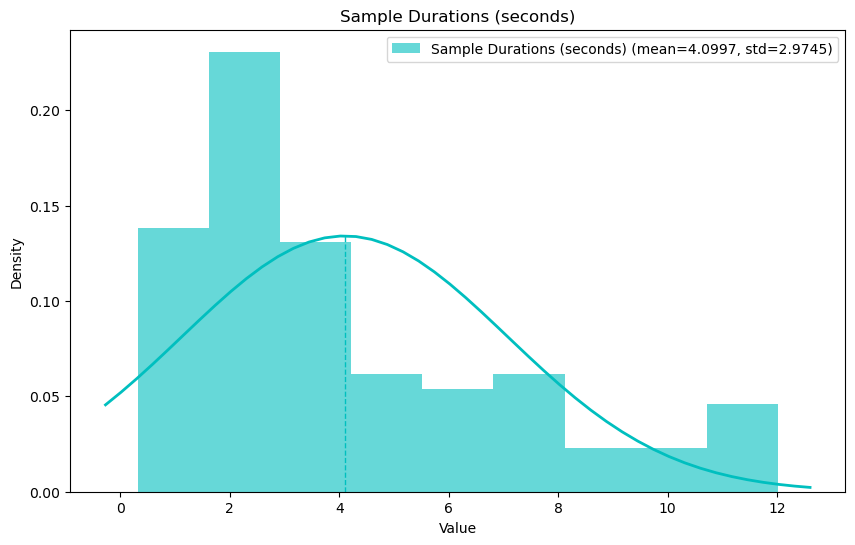

Input STFTs: torch.Size([100, 1024, 114]) x torch.float32
Using model=StepWiseVAEMLP
Optimising hyper-parameters:


[Integer(low=16, high=512, prior='log-uniform', transform='identity'),
 Real(low=1e-06, high=0.01, prior='log-uniform', transform='identity'),
 Real(low=1e-08, high=0.01, prior='log-uniform', transform='identity'),
 Integer(low=40, high=50, prior='uniform', transform='identity'),
 Integer(low=2, high=4, prior='uniform', transform='identity'),
 Real(low=0.1, high=4, prior='log-uniform', transform='identity'),
 Integer(low=4, high=8, prior='uniform', transform='identity'),
 Integer(low=1, high=5, prior='uniform', transform='identity'),
 Real(low=0.1, high=4, prior='log-uniform', transform='identity')]




Hyper-Parameter tuning#1

train_model: hyper-parameters=[465, 0.00802947698703371, 9.529469905758119e-05, 41, 3, 0.18149303636670133, 7, 5, 2.3577060460637767]
opt_params=[465, 0.00802947698703371, 9.529469905758119e-05], model_params=[41, 3, 0.18149303636670133, 7, 5, 2.3577060460637767]
optimiser: batch=7, learning_rate=0.008, weight_decay=0.0001
encode=[2049, 278, 41]=581,339, decode=[1066, 1028, 1024]=2,150,572, total=2,731,911
VAE_layers=[4674, 4496, 3763, 2305, 7]
StepWiseMLPAutoEncoder compression: 25.0 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=278, bias=True)
    (1): ReLU()
    (2): Linear(in_features=278, out_features=41, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1066, out_features=1028, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1028, out_features=1024, bias=True)
  )
)

VAE_layers=[4674, 4496, 3763, 2305, 7]
VariationalAutoEncoder compression: 667.7 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList(
    (0): Linear(in_features=4674, out_features=4496, bias=True)
    (1): Linear(in_features=4496, out_features=3763, bias=True)
    (2): Linear(in_features=3763, out_features=2305, bias=True)
  )
  (fc_mu): Linear(in_features=2305, out_features=7, bias=True)
  (fc_logvar): Linear(in_features=2305, out_features=7, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=7, out_features=2305, bias=True)
    (1): Linear(in_features=2305, out_features=3763, bias=True)
    (2): Linear(in_features=3763, out_features=4496, bias=True)
    (3): Linear(in_features=4496, out_features=4674, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=95,998,257 parameters, exact=96,019,066, error=-0.02%
model: StepWiseVAEMLP: control=41, depth=3, ratio=0.18, latent=7, VAE depth=5, VAE ratio=2.3577060460637767
train=80 samples, batch=7 --> 11.4 batches/epoch
*** Exception: model.forward_loss returned NaN :(



Hyper-Parameter tuning#2

train_model: hyper-parameters=[82, 8.029476987033712e-05, 9.529469905758098e-08, 46, 4, 1.1478627487570938, 5, 3, 0.3727860579355699]
opt_params=[82, 8.029476987033712e-05, 9.529469905758098e-08], model_params=[46, 4, 1.1478627487570938, 5, 3, 0.3727860579355699]
optimiser: batch=7, learning_rate=8e-05, weight_decay=1e-07
encode=[2049, 1481, 791, 46]=4,244,744, decode=[1071, 1057, 1041, 1024]=3,301,490, total=7,546,234
VAE_layers=[5244, 1197, 5]
StepWiseMLPAutoEncoder compression: 22.3 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=1481, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1481, out_features=791, bias=True)
    (3): ReLU()
    (4): Linear(in_features=791, out_features=46, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1071, out_features=1057, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1057, out_features=1041, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1041, out_features=1024, bias=True)
  )
)

VAE_layers=[5244, 1197, 5]
VariationalAutoEncoder compression: 1048.8 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList(
    (0): Linear(in_features=5244, out_features=1197, bias=True)
  )
  (fc_mu): Linear(in_features=1197, out_features=5, bias=True)
  (fc_logvar): Linear(in_features=1197, out_features=5, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=5, out_features=1197, bias=True)
    (1): Linear(in_features=1197, out_features=5244, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=20,114,744 parameters, exact=20,125,973, error=-0.06%
model: StepWiseVAEMLP: control=46, depth=4, ratio=1.15, latent=5, VAE depth=3, VAE ratio=0.3727860579355699
train=80 samples, batch=7 --> 11.4 batches/epoch
total=6 sec, epoch=1 (6.0 sec/epoch), train=0.0086 (0.00%), test=0.0066 (0.00%), overfit=0.77
total=12 sec, epoch=2 (5.8 sec/epoch), train=0.0067 (-21.43%), test=0.0053 (-19.68%), overfit=0.79
total=17 sec, epoch=3 (5.8 sec/epoch), train=0.0060 (-10.42%), test=0.0046 (-13.61%), overfit=0.76
total=23 sec, epoch=4 (5.7 sec/epoch), train=0.0058 (-3.10%), test=0.0044 (-3.76%), overfit=0.75
total=28 sec, epoch=5 (5.7 sec/epoch), train=0.0056 (-4.35%), test=0.0042 (-4.17%), overfit=0.76
total=34 sec, epoch=6 (5.6 sec/epoch), train=0.0055 (-1.73%), test=0.0041 (-3.44%), overfit=0.74
total=39 sec, epoch=7 (5.6 sec/epoch), train=0.0053 (-4.17%), test=0.0040 (-1.55%), overfit=0.76
total=45 sec, epoch=8 (5.6 sec/epoch), train=0.0052 (-1.46%), test=0.0041 (

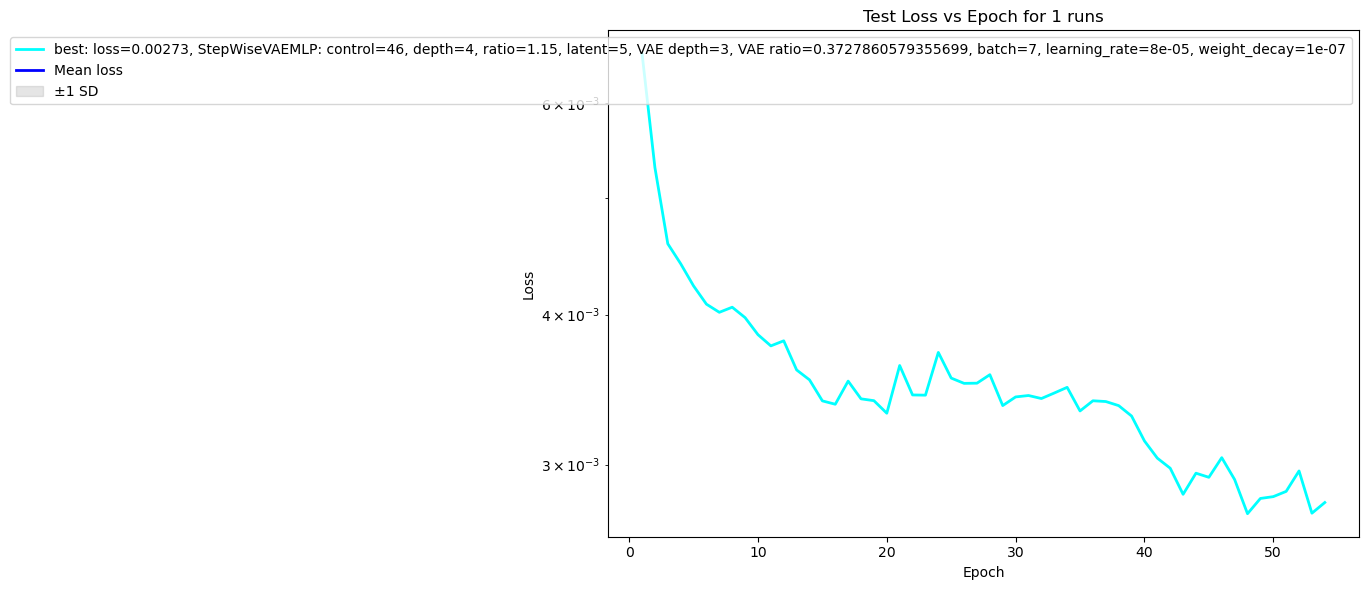




Hyper-Parameter tuning#3

train_model: hyper-parameters=[196, 8.029476987033711e-06, 3.0134829796225707e-06, 44, 2, 0.4564308223643021, 6, 2, 0.1482329199843083]
opt_params=[196, 8.029476987033711e-06, 3.0134829796225707e-06], model_params=[44, 2, 0.4564308223643021, 6, 2, 0.1482329199843083]
optimiser: batch=7, learning_rate=8e-06, weight_decay=3e-06
encode=[2049, 44]=90,200, decode=[1069, 1024]=1,095,680, total=1,185,880
VAE_layers=[5016, 6]
StepWiseMLPAutoEncoder compression: 23.3 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=44, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1069, out_features=1024, bias=True)
  )
)

VAE_layers=[5016, 6]
VariationalAutoEncoder compression: 836.0 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList()
  (fc_mu): Linear(in_features=5016, out_features=6, bias=True)
  (fc_logvar): Linear(in_features=5016, out_features=6, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=6, out_features=5016, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=1,246,084 parameters, exact=1,281,196, error=-2.74%
model: StepWiseVAEMLP: control=44, depth=2, ratio=0.46, latent=6, VAE depth=2, VAE ratio=0.1482329199843083
train=80 samples, batch=7 --> 11.4 batches/epoch
total=6 sec, epoch=2 (3.1 sec/epoch), train=0.0606 (-9.86%), test=0.0468 (-25.51%), overfit=0.77
total=12 sec, epoch=4 (3.0 sec/epoch), train=0.0548 (-6.84%), test=0.0639 (15.33%), overfit=1.17
total=18 sec, epoch=6 (3.0 sec/epoch), train=0.0548 (-5.43%), test=0.0567 (18.92%), overfit=1.03
total=23 sec, epoch=8 (2.9 sec/epoch), train=0.0515 (-9.69%), test=0.0542 (26.13%), overfit=1.05
total=29 sec, epoch=10 (2.9 sec/epoch), train=0.0484 (-1.61%), test=0.0454 (-19.98%), overfit=0.94
total=35 sec, epoch=12 (2.9 sec/epoch), train=0.0482 (-10.21%), test=0.0488 (10.80%), overfit=1.01
total=41 sec, epoch=14 (2.9 sec/epoch), train=0.0467 (-0.79%), test=0.0413 (-6.95%), overfit=0.88
total=47 sec, epoch=16 (2.9 sec/epoch), train=0.0439 (-1.11%), test=0.044

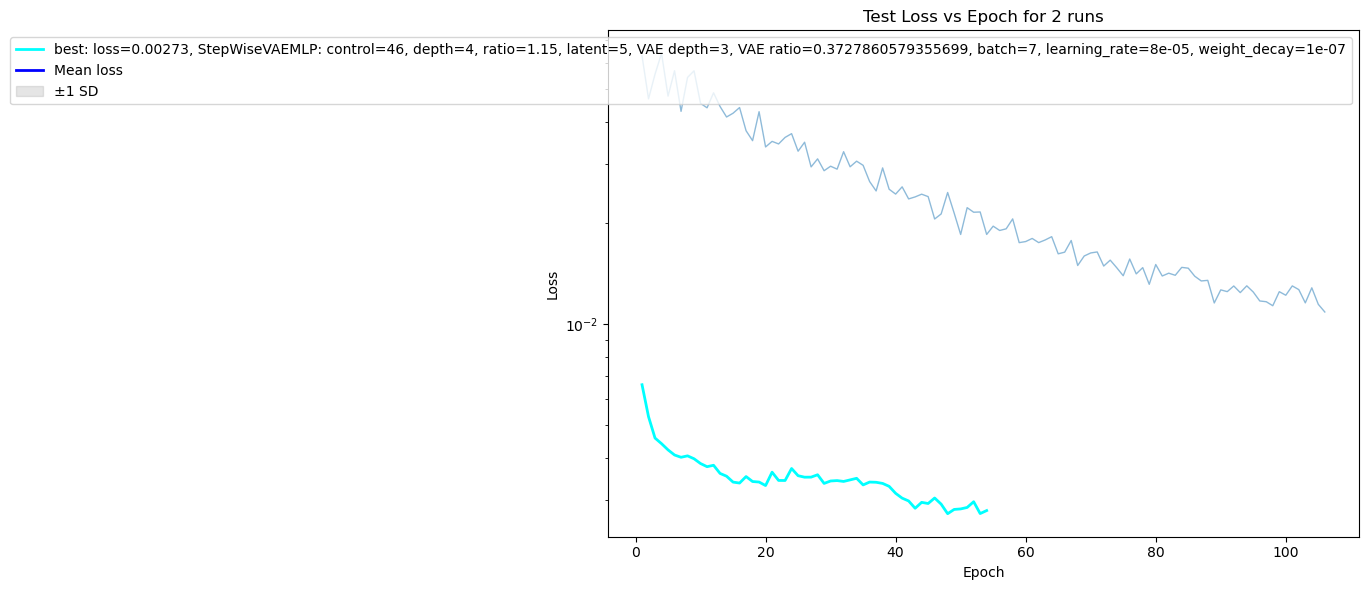




Hyper-Parameter tuning#4

train_model: hyper-parameters=[35, 0.0008029476987033711, 0.0030134829796225767, 49, 3, 2.8867219859498285, 4, 4, 0.9375073027358104]
opt_params=[35, 0.0008029476987033711, 0.0030134829796225767], model_params=[49, 3, 2.8867219859498285, 4, 4, 0.9375073027358104]
optimiser: batch=7, learning_rate=0.0008, weight_decay=0.003
encode=[2049, 1778, 49]=3,732,071, decode=[1074, 1067, 1024]=2,240,657, total=5,972,728
VAE_layers=[5586, 3593, 1769, 4]
StepWiseMLPAutoEncoder compression: 20.9 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=1778, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1778, out_features=49, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1074, out_features=1067, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1067, out_features=1024, bias=True)
  )
)

VAE_layers=[5586, 3593, 1769, 4]
VariationalAutoEncoder compression: 1396.5 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList(
    (0): Linear(in_features=5586, out_features=3593, bias=True)
    (1): Linear(in_features=3593, out_features=1769, bias=True)
  )
  (fc_mu): Linear(in_features=1769, out_features=4, bias=True)
  (fc_logvar): Linear(in_features=1769, out_features=4, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=4, out_features=1769, bias=True)
    (1): Linear(in_features=1769, out_features=3593, bias=True)
    (2): Linear(in_features=3593, out_features=5586, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=58,850,642 parameters, exact=58,863,304, error=-0.02%
model: StepWiseVAEMLP: control=49, depth=3, ratio=2.89, latent=4, VAE depth=4, VAE ratio=0.9375073027358104
train=80 samples, batch=7 --> 11.4 batches/epoch
total=5 sec, epoch=1 (4.9 sec/epoch), train=0.0067 (0.00%), test=0.0090 (0.00%), overfit=1.34
total=14 sec, epoch=3 (4.6 sec/epoch), train=0.0056 (-2.74%), test=0.0078 (-2.65%), overfit=1.40
total=22 sec, epoch=5 (4.5 sec/epoch), train=0.0055 (-0.45%), test=0.0077 (-0.51%), overfit=1.40
total=31 sec, epoch=7 (4.5 sec/epoch), train=0.0055 (0.37%), test=0.0078 (0.87%), overfit=1.40
total=40 sec, epoch=9 (4.4 sec/epoch), train=0.0056 (-0.08%), test=0.0078 (0.26%), overfit=1.40
total=48 sec, epoch=11 (4.4 sec/epoch), train=0.0056 (2.20%), test=0.0078 (1.72%), overfit=1.39
total=57 sec, epoch=13 (4.4 sec/epoch), train=0.0055 (-0.81%), test=0.0077 (-0.57%), overfit=1.39
total=65 sec, epoch=15 (4.4 sec/epoch), train=0.0055 (-0.53%), test=0.0077 (-0.46%

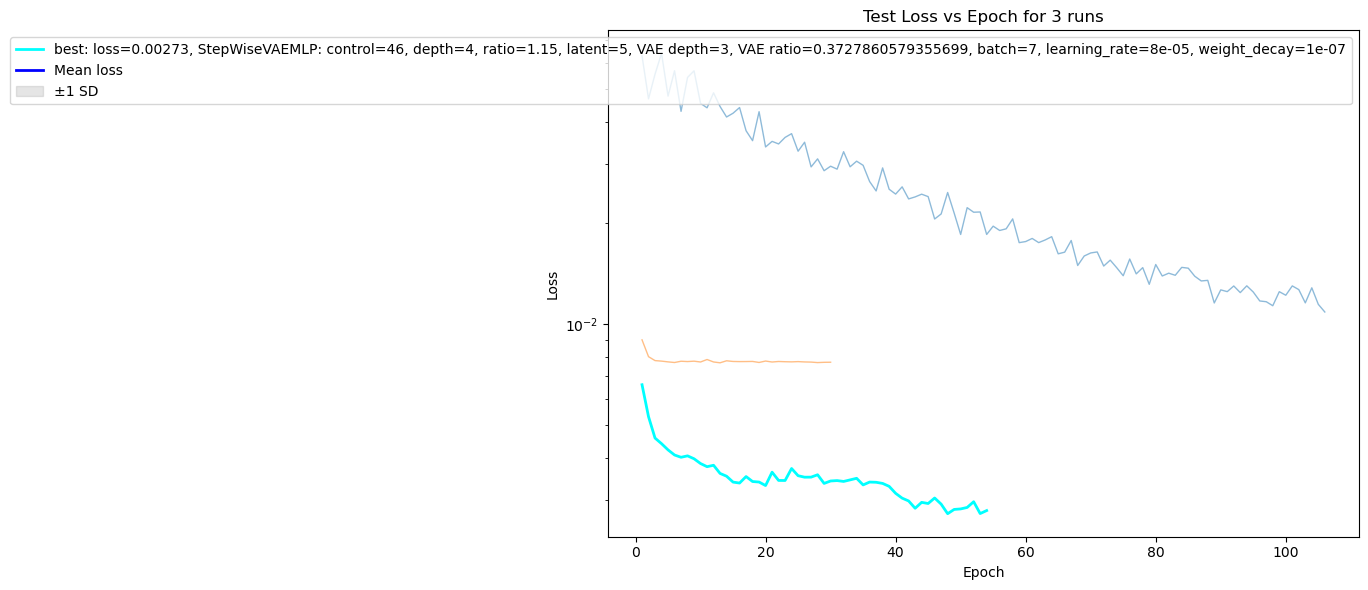




Hyper-Parameter tuning#5

train_model: hyper-parameters=[53, 2.5391435698932812e-05, 5.35881473516556e-07, 42, 3, 0.11444648731793261, 8, 3, 3.7389284650695953]
opt_params=[53, 2.5391435698932812e-05, 5.35881473516556e-07], model_params=[42, 3, 0.11444648731793261, 8, 3, 3.7389284650695953]
optimiser: batch=7, learning_rate=3e-05, weight_decay=5e-07
encode=[2049, 195, 42]=407,982, decode=[1067, 1027, 1024]=2,149,508, total=2,557,490
VAE_layers=[4788, 4429, 8]
StepWiseMLPAutoEncoder compression: 24.4 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=195, bias=True)
    (1): ReLU()
    (2): Linear(in_features=195, out_features=42, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1067, out_features=1027, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1027, out_features=1024, bias=True)
  )
)

VAE_layers=[4788, 4429, 8]
VariationalAutoEncoder compression: 598.5 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList(
    (0): Linear(in_features=4788, out_features=4429, bias=True)
  )
  (fc_mu): Linear(in_features=4429, out_features=8, bias=True)
  (fc_logvar): Linear(in_features=4429, out_features=8, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=8, out_features=4429, bias=True)
    (1): Linear(in_features=4429, out_features=4788, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=45,049,332 parameters, exact=45,089,552, error=-0.09%
model: StepWiseVAEMLP: control=42, depth=3, ratio=0.11, latent=8, VAE depth=3, VAE ratio=3.7389284650695953
train=80 samples, batch=7 --> 11.4 batches/epoch
total=5 sec, epoch=1 (4.6 sec/epoch), train=0.0095 (0.00%), test=0.0110 (0.00%), overfit=1.16
total=13 sec, epoch=3 (4.4 sec/epoch), train=0.0076 (-10.75%), test=0.0090 (-9.56%), overfit=1.18
total=22 sec, epoch=5 (4.3 sec/epoch), train=0.0061 (-10.50%), test=0.0073 (-9.33%), overfit=1.20
total=30 sec, epoch=7 (4.3 sec/epoch), train=0.0054 (-5.19%), test=0.0064 (-5.46%), overfit=1.18
total=38 sec, epoch=9 (4.2 sec/epoch), train=0.0053 (-1.80%), test=0.0060 (-2.99%), overfit=1.14
total=46 sec, epoch=11 (4.2 sec/epoch), train=0.0053 (-0.43%), test=0.0061 (-1.66%), overfit=1.16
total=54 sec, epoch=13 (4.2 sec/epoch), train=0.0050 (-2.96%), test=0.0059 (-0.22%), overfit=1.19
total=63 sec, epoch=15 (4.2 sec/epoch), train=0.0049 (-3.51%), test=0.0059 

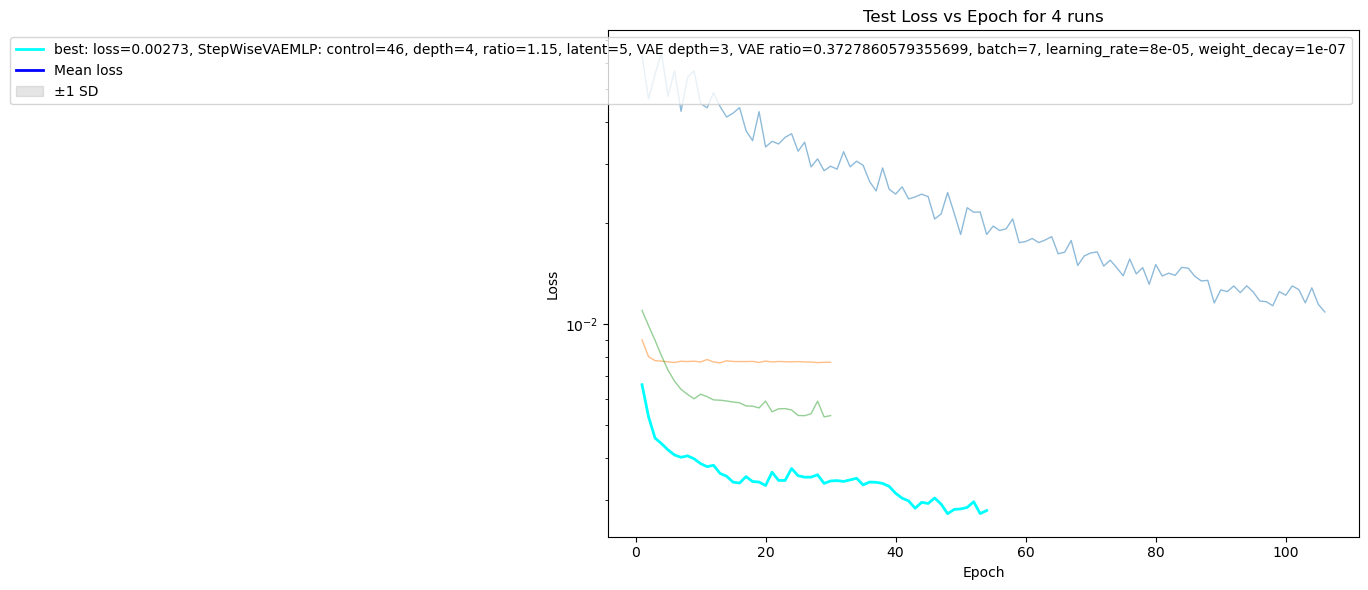




Hyper-Parameter tuning#6

train_model: hyper-parameters=[302, 0.0025391435698932812, 0.0005358814735165571, 47, 4, 0.7238231402604843, 6, 1, 0.5911764979028612]
opt_params=[302, 0.0025391435698932812, 0.0005358814735165571], model_params=[47, 4, 0.7238231402604843, 6, 1, 0.5911764979028612]
optimiser: batch=7, learning_rate=0.003, weight_decay=0.0005
encode=[2049, 1145, 556, 47]=3,010,605, decode=[1072, 1050, 1036, 1024]=3,277,374, total=6,287,979
VAE_layers=[5358, 6]
StepWiseMLPAutoEncoder compression: 21.8 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=1145, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1145, out_features=556, bias=True)
    (3): ReLU()
    (4): Linear(in_features=556, out_features=47, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1072, out_features=1050, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1050, out_features=1036, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1036, out_features=1024, bias=True)
  )
)

VAE_layers=[5358, 6]
VariationalAutoEncoder compression: 893.0 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList()
  (fc_mu): Linear(in_features=5358, out_features=6, bias=True)
  (fc_logvar): Linear(in_features=5358, out_features=6, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=6, out_features=5358, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=6,352,287 parameters, exact=6,389,793, error=-0.59%
model: StepWiseVAEMLP: control=47, depth=4, ratio=0.72, latent=6, VAE depth=1, VAE ratio=0.5911764979028612
train=80 samples, batch=7 --> 11.4 batches/epoch
total=6 sec, epoch=1 (6.2 sec/epoch), train=0.0058 (0.00%), test=0.0062 (0.00%), overfit=1.07
total=12 sec, epoch=2 (5.9 sec/epoch), train=0.0058 (0.67%), test=0.0064 (3.24%), overfit=1.10
total=18 sec, epoch=3 (5.8 sec/epoch), train=0.0056 (-3.82%), test=0.0058 (-9.05%), overfit=1.04
total=23 sec, epoch=4 (5.8 sec/epoch), train=0.0057 (1.65%), test=0.0061 (4.10%), overfit=1.06
total=29 sec, epoch=5 (5.8 sec/epoch), train=0.0057 (0.32%), test=0.0060 (-1.13%), overfit=1.05
total=34 sec, epoch=6 (5.7 sec/epoch), train=0.0057 (-0.56%), test=0.0059 (-0.66%), overfit=1.04
total=40 sec, epoch=7 (5.7 sec/epoch), train=0.0058 (2.14%), test=0.0063 (5.53%), overfit=1.08
total=46 sec, epoch=8 (5.7 sec/epoch), train=0.0057 (-1.87%), test=0.0059 (-5.22%), over

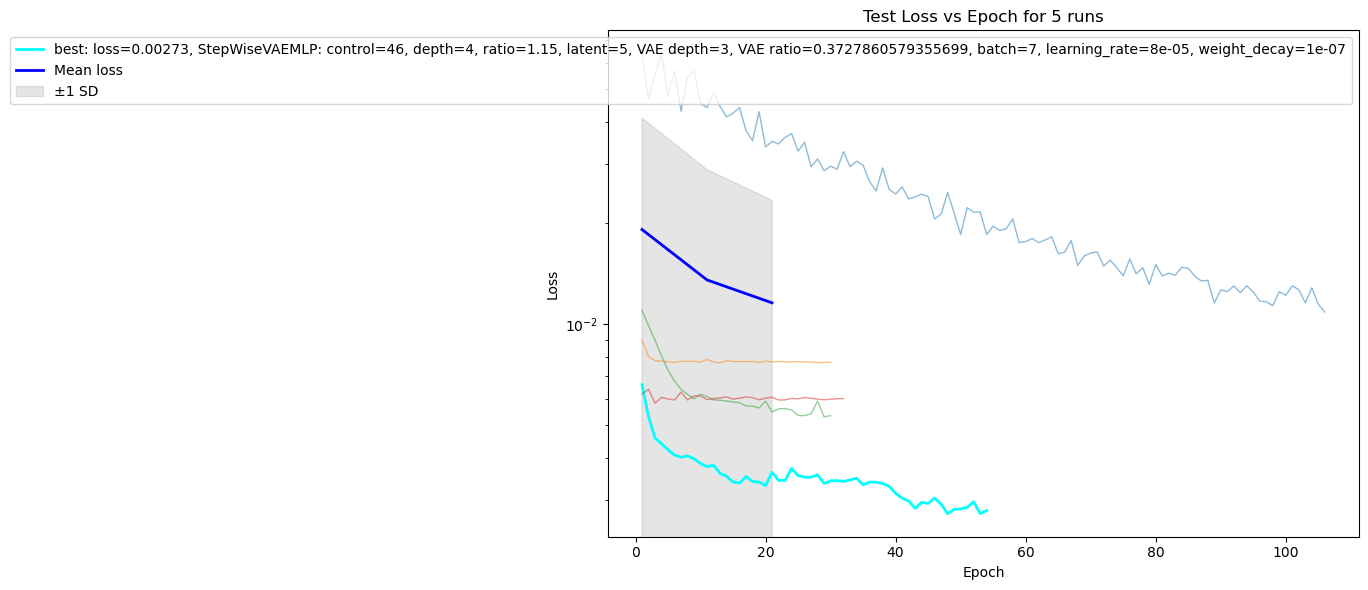




Hyper-Parameter tuning#7

train_model: hyper-parameters=[127, 2.5391435698932813e-06, 1.6946060121995182e-08, 45, 3, 1.820318827483226, 7, 4, 0.23507268215858054]
opt_params=[127, 2.5391435698932813e-06, 1.6946060121995182e-08], model_params=[45, 3, 1.820318827483226, 7, 4, 0.23507268215858054]
optimiser: batch=7, learning_rate=3e-06, weight_decay=2e-08
encode=[2049, 1481, 45]=3,102,740, decode=[1070, 1056, 1024]=2,213,344, total=5,316,084
VAE_layers=[5130, 1172, 472, 7]
StepWiseMLPAutoEncoder compression: 22.8 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=1481, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1481, out_features=45, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1070, out_features=1056, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1056, out_features=1024, bias=True)
  )
)

VAE_layers=[5130, 1172, 472, 7]
VariationalAutoEncoder compression: 732.9 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList(
    (0): Linear(in_features=5130, out_features=1172, bias=True)
    (1): Linear(in_features=1172, out_features=472, bias=True)
  )
  (fc_mu): Linear(in_features=472, out_features=7, bias=True)
  (fc_logvar): Linear(in_features=472, out_features=7, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=7, out_features=472, bias=True)
    (1): Linear(in_features=472, out_features=1172, bias=True)
    (2): Linear(in_features=1172, out_features=5130, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=18,457,082 parameters, exact=18,465,516, error=-0.05%
model: StepWiseVAEMLP: control=45, depth=3, ratio=1.82, latent=7, VAE depth=4, VAE ratio=0.23507268215858054
train=80 samples, batch=7 --> 11.4 batches/epoch
total=5 sec, epoch=1 (5.1 sec/epoch), train=0.0112 (0.00%), test=0.0109 (0.00%), overfit=0.97
total=14 sec, epoch=3 (4.7 sec/epoch), train=0.0109 (-1.35%), test=0.0106 (-1.17%), overfit=0.97
total=23 sec, epoch=5 (4.6 sec/epoch), train=0.0107 (-1.15%), test=0.0104 (-1.33%), overfit=0.97
total=31 sec, epoch=7 (4.5 sec/epoch), train=0.0104 (-1.08%), test=0.0101 (-1.01%), overfit=0.97
total=40 sec, epoch=9 (4.4 sec/epoch), train=0.0102 (-1.01%), test=0.0099 (-0.83%), overfit=0.97
total=49 sec, epoch=11 (4.4 sec/epoch), train=0.0100 (-0.85%), test=0.0097 (-1.04%), overfit=0.97
total=57 sec, epoch=13 (4.4 sec/epoch), train=0.0098 (-0.96%), test=0.0096 (-1.03%), overfit=0.97
total=66 sec, epoch=15 (4.4 sec/epoch), train=0.0097 (-0.95%), test=0.0094 (

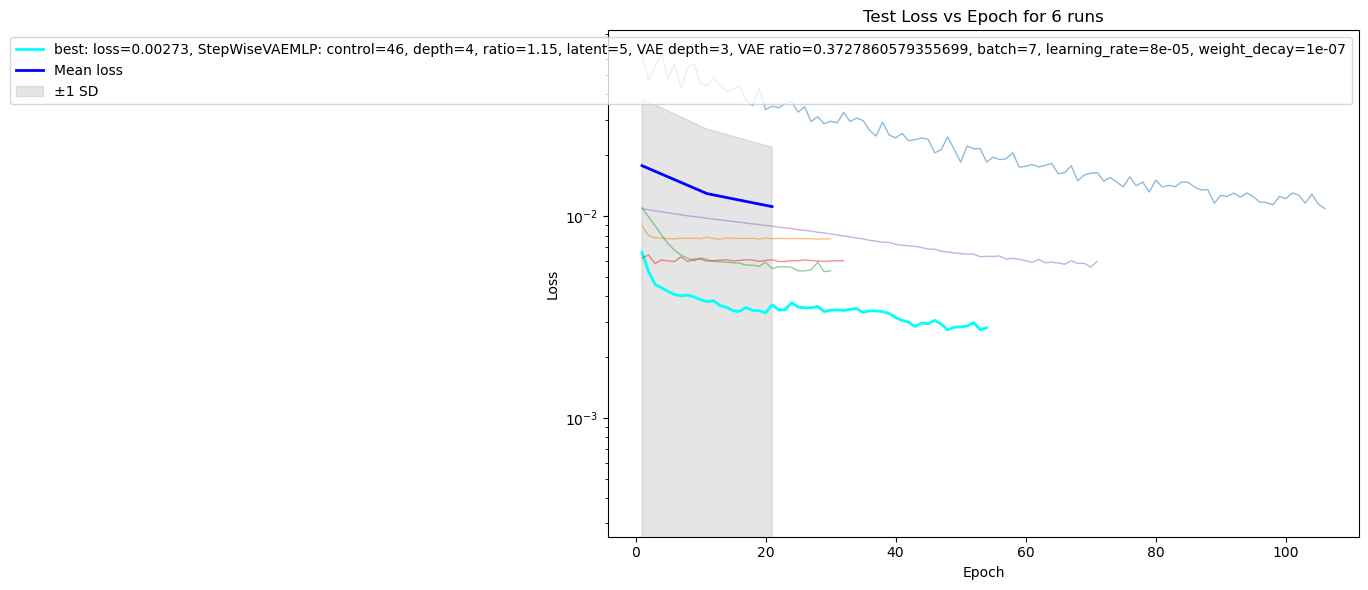




Hyper-Parameter tuning#8

train_model: hyper-parameters=[22, 0.0002539143569893281, 1.694606012199518e-05, 50, 2, 0.28781767812670517, 5, 2, 1.4867301826118826]
opt_params=[22, 0.0002539143569893281, 1.694606012199518e-05], model_params=[50, 2, 0.28781767812670517, 5, 2, 1.4867301826118826]
optimiser: batch=7, learning_rate=0.0003, weight_decay=2e-05
encode=[2049, 50]=102,500, decode=[1075, 1024]=1,101,824, total=1,204,324
VAE_layers=[5700, 5]
StepWiseMLPAutoEncoder compression: 20.5 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=50, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1075, out_features=1024, bias=True)
  )
)

VAE_layers=[5700, 5]
VariationalAutoEncoder compression: 1140.0 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList()
  (fc_mu): Linear(in_features=5700, out_features=5, bias=True)
  (fc_logvar): Linear(in_features=5700, out_features=5, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=5, out_features=5700, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=1,261,334 parameters, exact=1,295,534, error=-2.64%
model: StepWiseVAEMLP: control=50, depth=2, ratio=0.29, latent=5, VAE depth=2, VAE ratio=1.4867301826118826
train=80 samples, batch=7 --> 11.4 batches/epoch
total=6 sec, epoch=2 (3.0 sec/epoch), train=0.0188 (-38.71%), test=0.0155 (-53.14%), overfit=0.83
total=12 sec, epoch=4 (3.0 sec/epoch), train=0.0107 (-15.56%), test=0.0091 (-22.97%), overfit=0.85
total=18 sec, epoch=6 (2.9 sec/epoch), train=0.0091 (-4.46%), test=0.0075 (-9.98%), overfit=0.82
total=23 sec, epoch=8 (2.9 sec/epoch), train=0.0084 (-2.06%), test=0.0066 (-6.05%), overfit=0.79
total=29 sec, epoch=10 (2.9 sec/epoch), train=0.0077 (-2.83%), test=0.0061 (-4.97%), overfit=0.79
total=34 sec, epoch=12 (2.9 sec/epoch), train=0.0074 (-0.93%), test=0.0059 (-0.10%), overfit=0.79
total=40 sec, epoch=14 (2.9 sec/epoch), train=0.0071 (-1.76%), test=0.0057 (-1.36%), overfit=0.80
total=46 sec, epoch=16 (2.8 sec/epoch), train=0.0070 (-0.38%), test=0.00

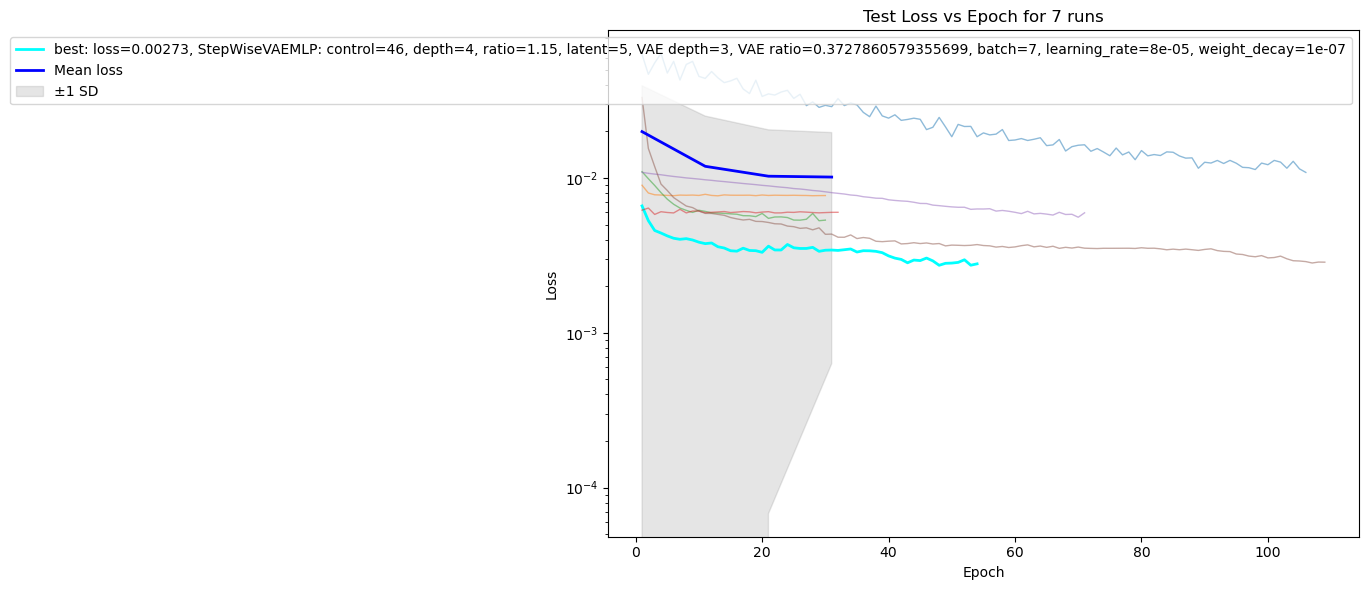




Hyper-Parameter tuning#9

train_model: hyper-parameters=[28, 1.4278653599423415e-05, 0.007146094300335916, 48, 2, 0.36244842325268306, 7, 4, 0.1177106923764483]
opt_params=[28, 1.4278653599423415e-05, 0.007146094300335916], model_params=[48, 2, 0.36244842325268306, 7, 4, 0.1177106923764483]
optimiser: batch=7, learning_rate=1e-05, weight_decay=0.007
encode=[2049, 48]=98,400, decode=[1073, 1024]=1,099,776, total=1,198,176
VAE_layers=[5472, 669, 261, 7]
StepWiseMLPAutoEncoder compression: 21.3 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=48, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1073, out_features=1024, bias=True)
  )
)

VAE_layers=[5472, 669, 261, 7]
VariationalAutoEncoder compression: 781.7 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList(
    (0): Linear(in_features=5472, out_features=669, bias=True)
    (1): Linear(in_features=669, out_features=261, bias=True)
  )
  (fc_mu): Linear(in_features=261, out_features=7, bias=True)
  (fc_logvar): Linear(in_features=261, out_features=7, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=7, out_features=261, bias=True)
    (1): Linear(in_features=261, out_features=669, bias=True)
    (2): Linear(in_features=669, out_features=5472, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=8,874,458 parameters, exact=8,881,757, error=-0.08%
model: StepWiseVAEMLP: control=48, depth=2, ratio=0.36, latent=7, VAE depth=4, VAE ratio=0.1177106923764483
train=80 samples, batch=7 --> 11.4 batches/epoch
total=3 sec, epoch=1 (3.5 sec/epoch), train=0.0130 (0.00%), test=0.0168 (0.00%), overfit=1.30
total=9 sec, epoch=3 (3.1 sec/epoch), train=0.0124 (-1.01%), test=0.0161 (-2.23%), overfit=1.29
total=15 sec, epoch=5 (3.1 sec/epoch), train=0.0120 (-2.21%), test=0.0158 (-2.69%), overfit=1.32
total=21 sec, epoch=7 (3.0 sec/epoch), train=0.0116 (-1.61%), test=0.0153 (-0.77%), overfit=1.32
total=27 sec, epoch=9 (3.0 sec/epoch), train=0.0113 (-0.90%), test=0.0151 (-2.12%), overfit=1.33
total=33 sec, epoch=11 (3.0 sec/epoch), train=0.0110 (-1.56%), test=0.0148 (-2.35%), overfit=1.34
total=38 sec, epoch=13 (2.9 sec/epoch), train=0.0107 (-0.95%), test=0.0144 (-1.59%), overfit=1.34
total=44 sec, epoch=15 (2.9 sec/epoch), train=0.0106 (-0.50%), test=0.0143 (-0.2

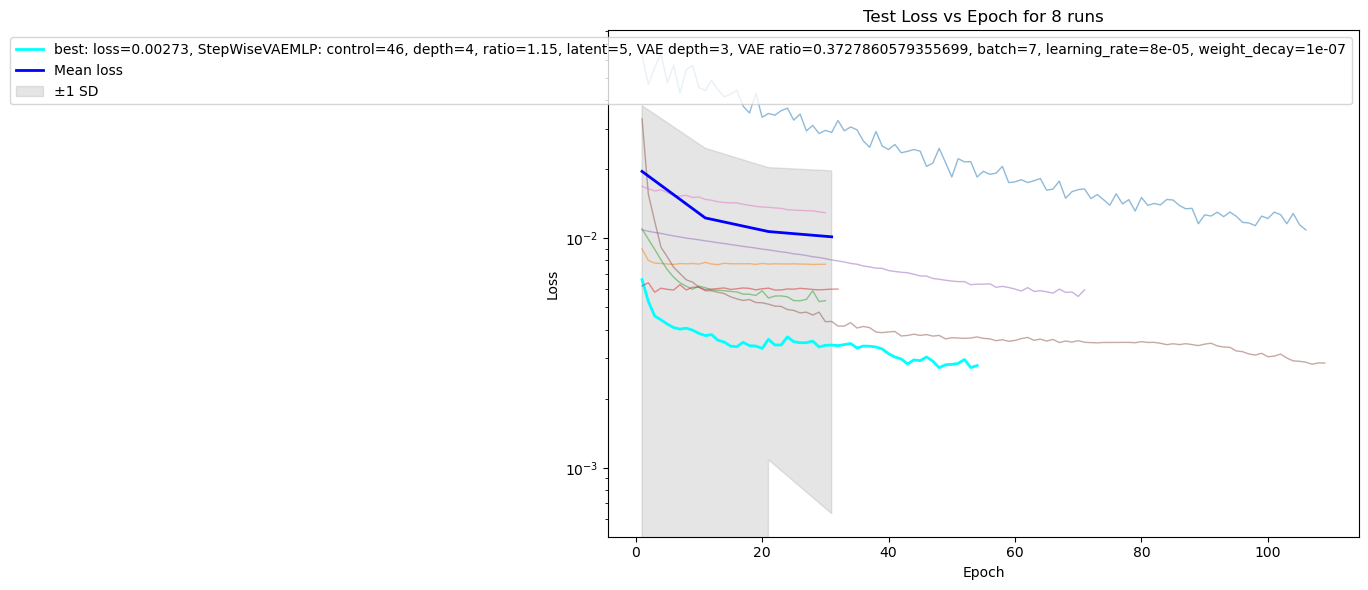




Hyper-Parameter tuning#10

train_model: hyper-parameters=[157, 0.0014278653599423415, 7.146094300335902e-06, 43, 3, 2.2923251036304255, 5, 2, 0.7444677857299897]
opt_params=[157, 0.0014278653599423415, 7.146094300335902e-06], model_params=[43, 3, 2.2923251036304255, 5, 2, 0.7444677857299897]
optimiser: batch=7, learning_rate=0.001, weight_decay=7e-06
encode=[2049, 1639, 43]=3,430,470, decode=[1068, 1059, 1024]=2,217,511, total=5,647,981
VAE_layers=[4902, 5]
StepWiseMLPAutoEncoder compression: 23.8 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=1639, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1639, out_features=43, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1068, out_features=1059, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1059, out_features=1024, bias=True)
  )
)

VAE_layers=[4902, 5]
VariationalAutoEncoder compression: 980.4 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList()
  (fc_mu): Linear(in_features=4902, out_features=5, bias=True)
  (fc_logvar): Linear(in_features=4902, out_features=5, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=5, out_features=4902, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=5,697,011 parameters, exact=5,726,423, error=-0.51%
model: StepWiseVAEMLP: control=43, depth=3, ratio=2.29, latent=5, VAE depth=2, VAE ratio=0.7444677857299897
train=80 samples, batch=7 --> 11.4 batches/epoch
total=5 sec, epoch=1 (4.9 sec/epoch), train=0.0061 (0.00%), test=0.0082 (0.00%), overfit=1.33
total=14 sec, epoch=3 (4.5 sec/epoch), train=0.0102 (78.18%), test=0.0085 (13.33%), overfit=0.84
total=22 sec, epoch=5 (4.4 sec/epoch), train=0.0068 (5.54%), test=0.0108 (15.85%), overfit=1.59
total=31 sec, epoch=7 (4.4 sec/epoch), train=1.8542 (34685.38%), test=0.4933 (6606.66%), overfit=0.27
*** Exception: model.forward_loss exploded: loss=1.43799e+07 :(



Hyper-Parameter tuning#11

train_model: hyper-parameters=[374, 1.4278653599423417e-06, 2.2597934363408809e-07, 41, 4, 0.911509527867587, 6, 3, 0.29602671925054064]
opt_params=[374, 1.4278653599423417e-06, 2.2597934363408809e-07], model_params=[41, 4, 0.911509527867587, 6, 3, 0.29602671925054064]
opti

StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=1311, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1311, out_features=661, bias=True)
    (3): ReLU()
    (4): Linear(in_features=661, out_features=41, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1066, out_features=1050, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1050, out_features=1036, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1036, out_features=1024, bias=True)
  )
)

VAE_layers=[4674, 871, 6]
VariationalAutoEncoder compression: 779.0 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList(
    (0): Linear(in_features=4674, out_features=871, bias=True)
  )
  (fc_mu): Linear(in_features=871, out_features=6, bias=True)
  (fc_logvar): Linear(in_features=871, out_features=6, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=6, out_features=871, bias=True)
    (1): Linear(in_features=871, out_features=4674, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=15,007,312 parameters, exact=15,017,212, error=-0.07%
model: StepWiseVAEMLP: control=41, depth=4, ratio=0.91, latent=6, VAE depth=3, VAE ratio=0.29602671925054064
train=80 samples, batch=7 --> 11.4 batches/epoch
total=6 sec, epoch=1 (6.2 sec/epoch), train=0.0115 (0.00%), test=0.0098 (0.00%), overfit=0.86
total=12 sec, epoch=2 (6.0 sec/epoch), train=0.0114 (-0.77%), test=0.0097 (-1.03%), overfit=0.86
total=18 sec, epoch=3 (5.9 sec/epoch), train=0.0113 (-0.70%), test=0.0097 (-0.66%), overfit=0.86
total=23 sec, epoch=4 (5.8 sec/epoch), train=0.0112 (-0.77%), test=0.0096 (-0.67%), overfit=0.86
total=29 sec, epoch=5 (5.8 sec/epoch), train=0.0111 (-0.54%), test=0.0095 (-0.86%), overfit=0.85
total=34 sec, epoch=6 (5.7 sec/epoch), train=0.0111 (-0.79%), test=0.0094 (-0.74%), overfit=0.85
total=40 sec, epoch=7 (5.7 sec/epoch), train=0.0110 (-0.52%), test=0.0094 (-0.66%), overfit=0.85
total=45 sec, epoch=8 (5.6 sec/epoch), train=0.0109 (-0.70%), test=0.0093 (-0.

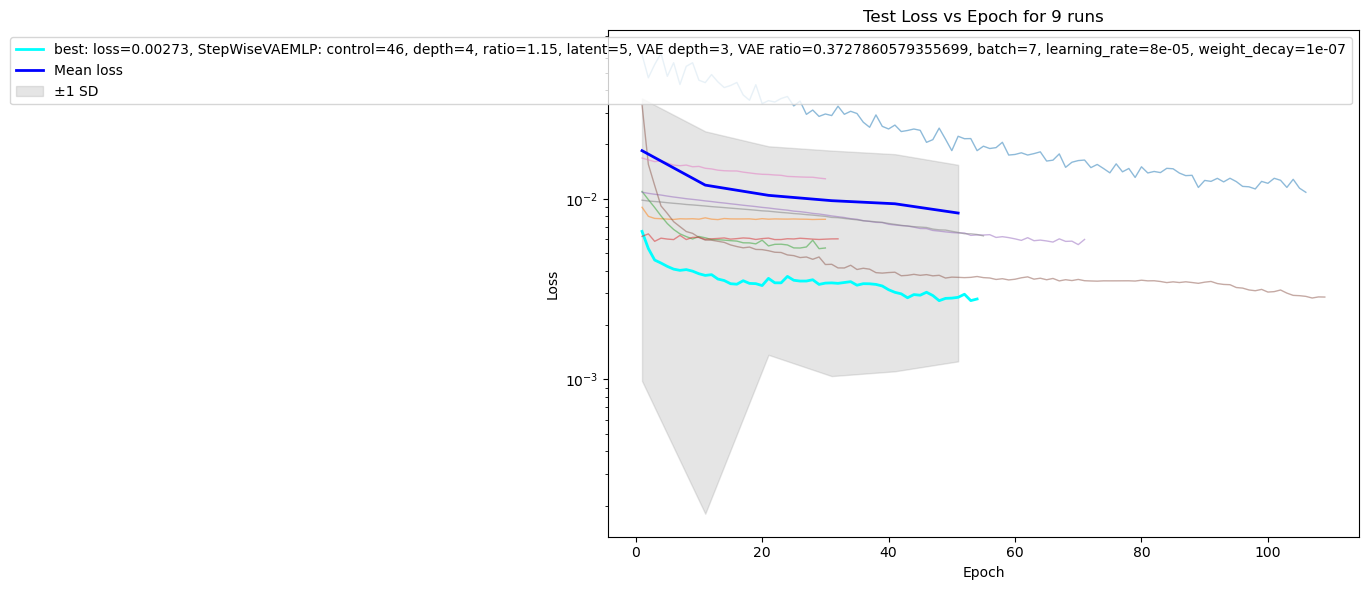




Hyper-Parameter tuning#12

train_model: hyper-parameters=[66, 0.00014278653599423416, 0.00022597934363408854, 46, 3, 0.1441223108503148, 4, 1, 1.872237362197843]
opt_params=[66, 0.00014278653599423416, 0.00022597934363408854], model_params=[46, 3, 0.1441223108503148, 4, 1, 1.872237362197843]
optimiser: batch=7, learning_rate=0.0001, weight_decay=0.0002
encode=[2049, 236, 46]=494,702, decode=[1071, 1028, 1024]=2,155,712, total=2,650,414
VAE_layers=[5244, 4]
StepWiseMLPAutoEncoder compression: 22.3 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=236, bias=True)
    (1): ReLU()
    (2): Linear(in_features=236, out_features=46, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1071, out_features=1028, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1028, out_features=1024, bias=True)
  )
)

VAE_layers=[5244, 4]
VariationalAutoEncoder compression: 1311.0 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList()
  (fc_mu): Linear(in_features=5244, out_features=4, bias=True)
  (fc_logvar): Linear(in_features=5244, out_features=4, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=4, out_features=5244, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=2,692,374 parameters, exact=2,718,594, error=-0.96%
model: StepWiseVAEMLP: control=46, depth=3, ratio=0.14, latent=4, VAE depth=1, VAE ratio=1.872237362197843
train=80 samples, batch=7 --> 11.4 batches/epoch
total=9 sec, epoch=2 (4.3 sec/epoch), train=0.0077 (-16.86%), test=0.0100 (-14.04%), overfit=1.30
total=17 sec, epoch=4 (4.3 sec/epoch), train=0.0064 (-8.61%), test=0.0086 (-7.18%), overfit=1.34
total=25 sec, epoch=6 (4.2 sec/epoch), train=0.0058 (-4.34%), test=0.0078 (-4.75%), overfit=1.33
total=33 sec, epoch=8 (4.2 sec/epoch), train=0.0054 (-4.04%), test=0.0074 (-4.69%), overfit=1.37
total=41 sec, epoch=10 (4.1 sec/epoch), train=0.0052 (-2.55%), test=0.0074 (-0.22%), overfit=1.42
total=49 sec, epoch=12 (4.1 sec/epoch), train=0.0051 (-1.05%), test=0.0070 (-4.08%), overfit=1.37
total=57 sec, epoch=14 (4.1 sec/epoch), train=0.0051 (-0.39%), test=0.0070 (-2.54%), overfit=1.38
total=66 sec, epoch=16 (4.1 sec/epoch), train=0.0050 (-0.45%), test=0.0070 

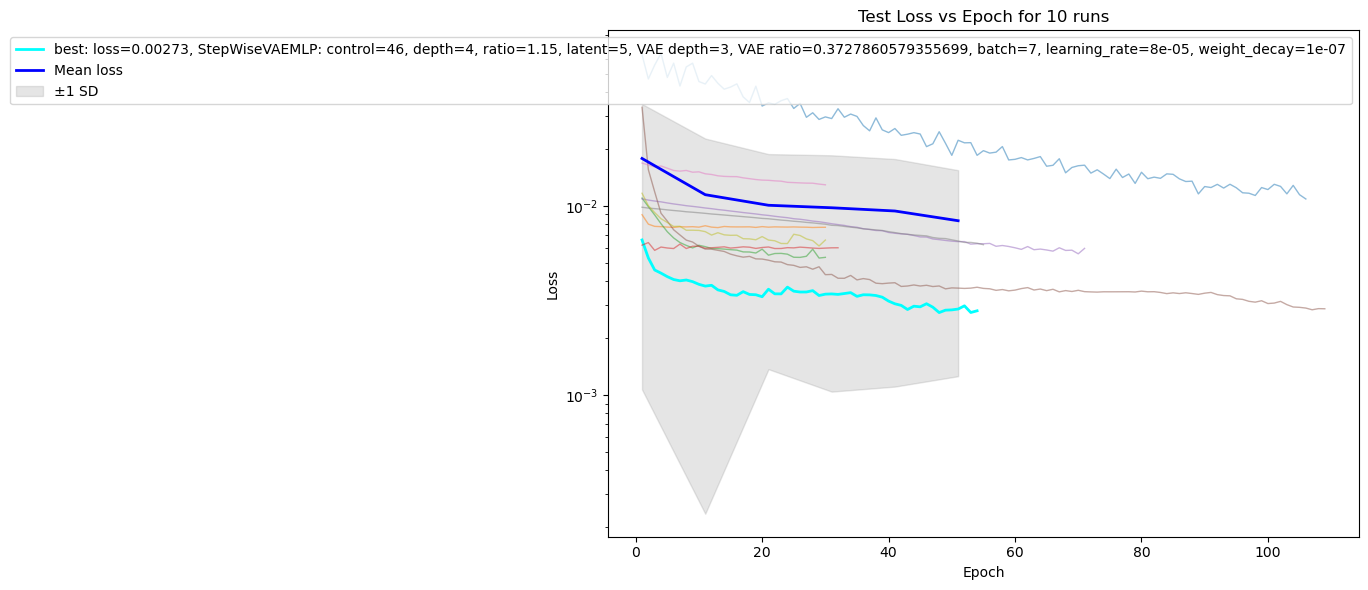




Hyper-Parameter tuning#13

train_model: hyper-parameters=[43, 4.515306729473949e-06, 4.0185441387860915e-05, 47, 4, 3.6352451975370483, 8, 2, 2.969056120704784]
opt_params=[43, 4.515306729473949e-06, 4.0185441387860915e-05], model_params=[47, 4, 3.6352451975370483, 8, 2, 2.969056120704784]
optimiser: batch=7, learning_rate=5e-06, weight_decay=4e-05
encode=[2049, 2012, 1590, 47]=7,400,047, decode=[1072, 1071, 1061, 1024]=3,374,063, total=10,774,110
VAE_layers=[5358, 8]
StepWiseMLPAutoEncoder compression: 21.8 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=2012, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2012, out_features=1590, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1590, out_features=47, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1072, out_features=1071, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1071, out_features=1061, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1061, out_features=1024, bias=True)
  )
)

VAE_layers=[5358, 8]
VariationalAutoEncoder compression: 669.8 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList()
  (fc_mu): Linear(in_features=5358, out_features=8, bias=True)
  (fc_logvar): Linear(in_features=5358, out_features=8, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=8, out_features=5358, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=10,859,854 parameters, exact=10,908,076, error=-0.44%
model: StepWiseVAEMLP: control=47, depth=4, ratio=3.64, latent=8, VAE depth=2, VAE ratio=2.969056120704784
train=80 samples, batch=7 --> 11.4 batches/epoch
total=6 sec, epoch=1 (6.2 sec/epoch), train=0.0120 (0.00%), test=0.0105 (0.00%), overfit=0.88
total=12 sec, epoch=2 (5.9 sec/epoch), train=0.0116 (-2.86%), test=0.0102 (-2.70%), overfit=0.88
total=17 sec, epoch=3 (5.8 sec/epoch), train=0.0113 (-3.00%), test=0.0098 (-3.90%), overfit=0.87
total=23 sec, epoch=4 (5.8 sec/epoch), train=0.0109 (-3.17%), test=0.0096 (-2.79%), overfit=0.88
total=29 sec, epoch=5 (5.7 sec/epoch), train=0.0107 (-2.25%), test=0.0093 (-2.28%), overfit=0.88
total=34 sec, epoch=6 (5.7 sec/epoch), train=0.0104 (-2.43%), test=0.0091 (-2.51%), overfit=0.87
total=40 sec, epoch=7 (5.7 sec/epoch), train=0.0102 (-2.27%), test=0.0088 (-2.96%), overfit=0.87
total=45 sec, epoch=8 (5.7 sec/epoch), train=0.0100 (-2.19%), test=0.0086 (-2.27

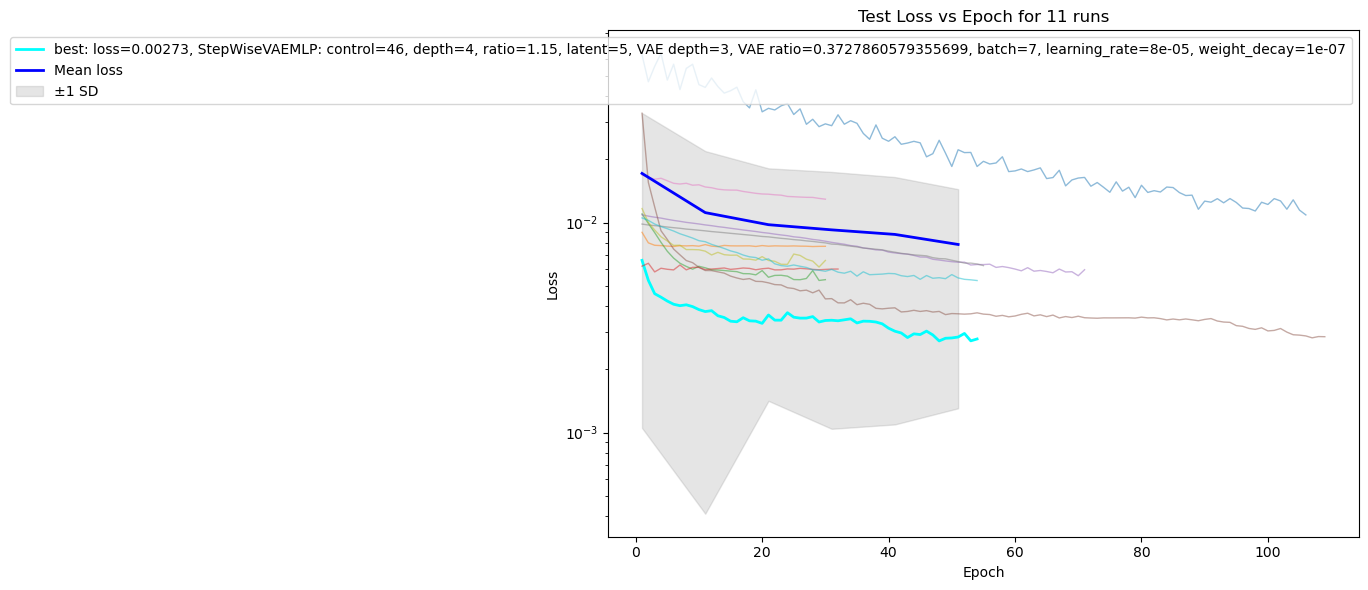




Hyper-Parameter tuning#14

train_model: hyper-parameters=[243, 0.00045153067294739487, 4.0185441387860917e-08, 42, 3, 0.5747827338702899, 6, 4, 0.4694489921145463]
opt_params=[243, 0.00045153067294739487, 4.0185441387860917e-08], model_params=[42, 3, 0.5747827338702899, 6, 4, 0.4694489921145463]
optimiser: batch=7, learning_rate=0.0005, weight_decay=4e-08
encode=[2049, 701, 42]=1,466,534, decode=[1067, 1038, 1024]=2,172,520, total=3,639,054
VAE_layers=[4788, 1932, 834, 6]
StepWiseMLPAutoEncoder compression: 24.4 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=701, bias=True)
    (1): ReLU()
    (2): Linear(in_features=701, out_features=42, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1067, out_features=1038, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1038, out_features=1024, bias=True)
  )
)

VAE_layers=[4788, 1932, 834, 6]
VariationalAutoEncoder compression: 798.0 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList(
    (0): Linear(in_features=4788, out_features=1932, bias=True)
    (1): Linear(in_features=1932, out_features=834, bias=True)
  )
  (fc_mu): Linear(in_features=834, out_features=6, bias=True)
  (fc_logvar): Linear(in_features=834, out_features=6, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=6, out_features=834, bias=True)
    (1): Linear(in_features=834, out_features=1932, bias=True)
    (2): Linear(in_features=1932, out_features=4788, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=25,378,014 parameters, exact=25,387,806, error=-0.04%
model: StepWiseVAEMLP: control=42, depth=3, ratio=0.57, latent=6, VAE depth=4, VAE ratio=0.4694489921145463
train=80 samples, batch=7 --> 11.4 batches/epoch
total=5 sec, epoch=1 (5.0 sec/epoch), train=0.0058 (0.00%), test=0.0061 (0.00%), overfit=1.04
total=14 sec, epoch=3 (4.6 sec/epoch), train=0.0048 (-24.84%), test=0.0050 (-16.49%), overfit=1.04
total=23 sec, epoch=5 (4.5 sec/epoch), train=0.0047 (-9.31%), test=0.0049 (-10.95%), overfit=1.05
total=31 sec, epoch=7 (4.4 sec/epoch), train=0.0044 (-3.37%), test=0.0046 (-3.57%), overfit=1.04
total=40 sec, epoch=9 (4.4 sec/epoch), train=0.0046 (3.95%), test=0.0048 (10.76%), overfit=1.06
total=48 sec, epoch=11 (4.4 sec/epoch), train=0.0044 (-1.30%), test=0.0045 (-1.69%), overfit=1.02
total=57 sec, epoch=13 (4.4 sec/epoch), train=0.0042 (1.83%), test=0.0044 (3.37%), overfit=1.05
total=65 sec, epoch=15 (4.3 sec/epoch), train=0.0039 (-6.79%), test=0.0045 (0

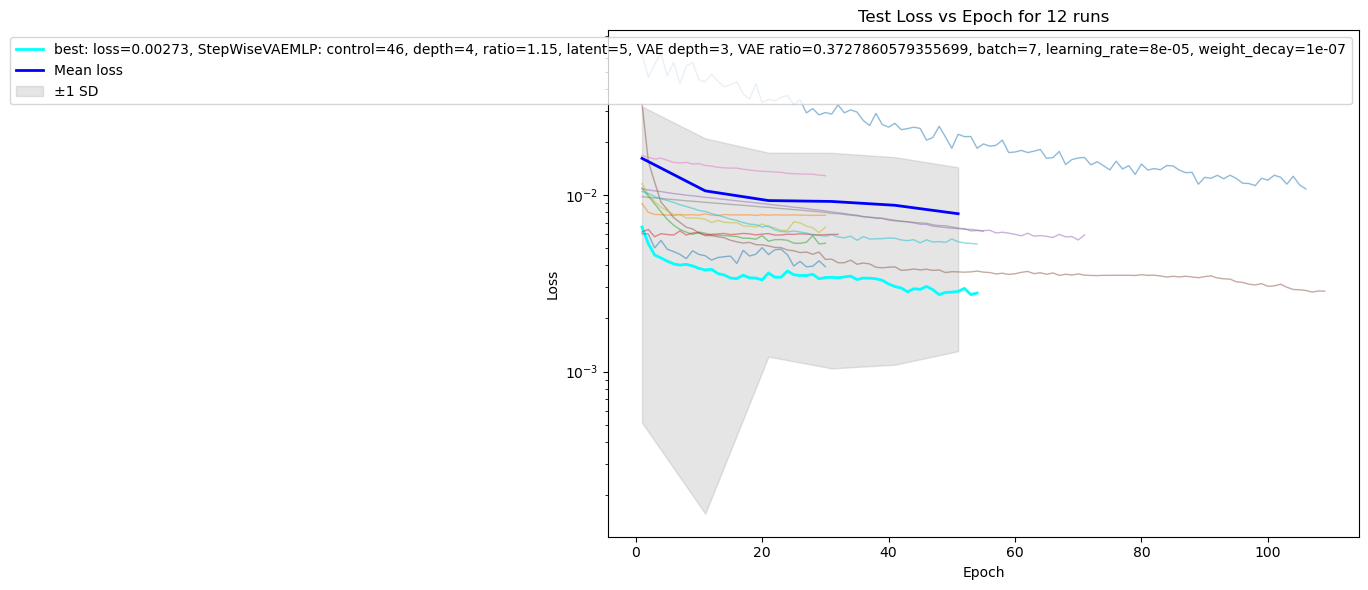




Hyper-Parameter tuning#15

train_model: hyper-parameters=[102, 4.515306729473949e-05, 0.0012707752356483863, 49, 2, 1.4455020487461048, 7, 5, 0.18666952103894627]
opt_params=[102, 4.515306729473949e-05, 0.0012707752356483863], model_params=[49, 2, 1.4455020487461048, 7, 5, 0.18666952103894627]
optimiser: batch=7, learning_rate=5e-05, weight_decay=0.001
encode=[2049, 49]=100,450, decode=[1074, 1024]=1,100,800, total=1,201,250
VAE_layers=[5586, 1279, 684, 298, 7]
StepWiseMLPAutoEncoder compression: 20.9 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=49, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1074, out_features=1024, bias=True)
  )
)

VAE_layers=[5586, 1279, 684, 298, 7]
VariationalAutoEncoder compression: 798.0 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList(
    (0): Linear(in_features=5586, out_features=1279, bias=True)
    (1): Linear(in_features=1279, out_features=684, bias=True)
    (2): Linear(in_features=684, out_features=298, bias=True)
  )
  (fc_mu): Linear(in_features=298, out_features=7, bias=True)
  (fc_logvar): Linear(in_features=298, out_features=7, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=7, out_features=298, bias=True)
    (1): Linear(in_features=298, out_features=684, bias=True)
    (2): Linear(in_features=684, out_features=1279, bias=True)
    (3): Linear(in_features=1279, out_features=5586, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=17,656,282 parameters, exact=17,663,954, error=-0.04%
model: StepWiseVAEMLP: control=49, depth=2, ratio=1.45, latent=7, VAE depth=5, VAE ratio=0.18666952103894627
train=80 samples, batch=7 --> 11.4 batches/epoch
total=4 sec, epoch=1 (3.9 sec/epoch), train=0.0112 (0.00%), test=0.0103 (0.00%), overfit=0.93
total=10 sec, epoch=3 (3.3 sec/epoch), train=0.0100 (-4.28%), test=0.0092 (-3.87%), overfit=0.92
total=16 sec, epoch=5 (3.2 sec/epoch), train=0.0094 (-2.59%), test=0.0087 (-2.25%), overfit=0.93
total=22 sec, epoch=7 (3.1 sec/epoch), train=0.0090 (-2.05%), test=0.0083 (-2.25%), overfit=0.92
total=27 sec, epoch=9 (3.0 sec/epoch), train=0.0086 (-1.84%), test=0.0080 (-1.74%), overfit=0.92
total=33 sec, epoch=11 (3.0 sec/epoch), train=0.0083 (-1.62%), test=0.0077 (-1.53%), overfit=0.92
total=39 sec, epoch=13 (3.0 sec/epoch), train=0.0081 (-1.62%), test=0.0075 (-1.61%), overfit=0.93
total=44 sec, epoch=15 (3.0 sec/epoch), train=0.0078 (-1.38%), test=0.0073 (

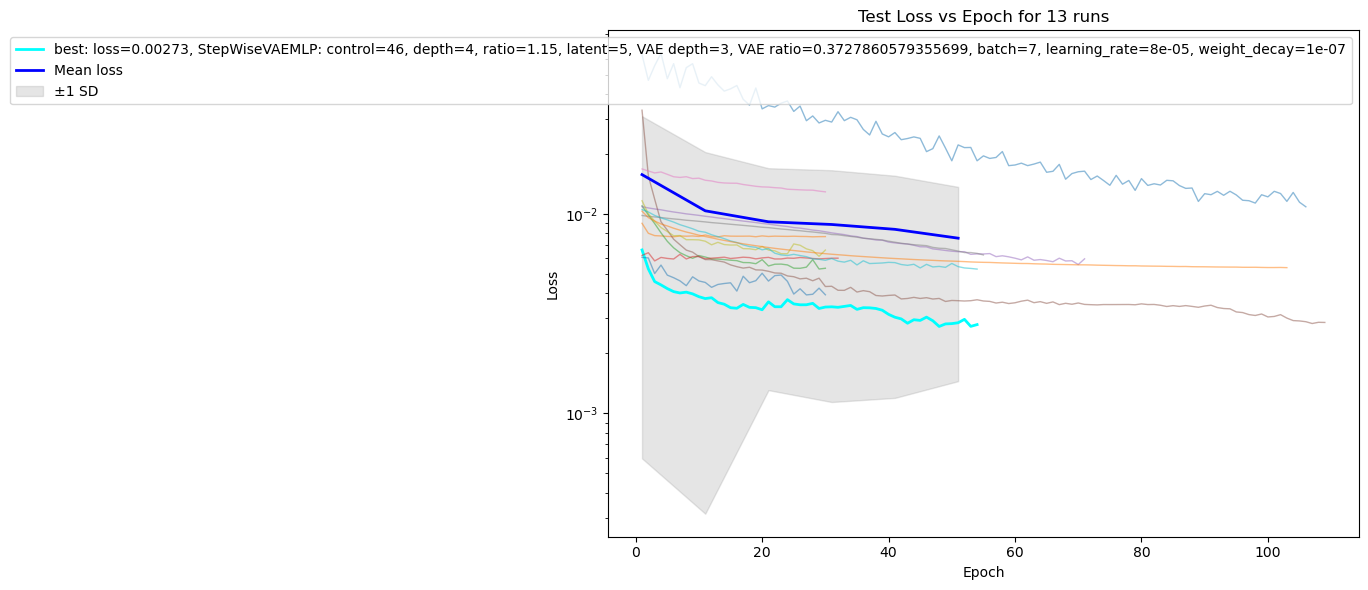




Hyper-Parameter tuning#16

train_model: hyper-parameters=[18, 0.0045153067294739484, 1.2707752356483836e-06, 44, 3, 0.2285539418238715, 5, 3, 1.1806017124315824]
opt_params=[18, 0.0045153067294739484, 1.2707752356483836e-06], model_params=[44, 3, 0.2285539418238715, 5, 3, 1.1806017124315824]
optimiser: batch=7, learning_rate=0.005, weight_decay=1e-06
encode=[2049, 337, 44]=705,722, decode=[1069, 1030, 1024]=2,157,844, total=2,863,566
VAE_layers=[5016, 2805, 5]
StepWiseMLPAutoEncoder compression: 23.3 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=337, bias=True)
    (1): ReLU()
    (2): Linear(in_features=337, out_features=44, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1069, out_features=1030, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1030, out_features=1024, bias=True)
  )
)

VAE_layers=[5016, 2805, 5]
VariationalAutoEncoder compression: 1003.2 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList(
    (0): Linear(in_features=5016, out_features=2805, bias=True)
  )
  (fc_mu): Linear(in_features=2805, out_features=5, bias=True)
  (fc_logvar): Linear(in_features=2805, out_features=5, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=5, out_features=2805, bias=True)
    (1): Linear(in_features=2805, out_features=5016, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=31,036,996 parameters, exact=31,056,037, error=-0.06%
model: StepWiseVAEMLP: control=44, depth=3, ratio=0.23, latent=5, VAE depth=3, VAE ratio=1.1806017124315824
train=80 samples, batch=7 --> 11.4 batches/epoch
*** Exception: model.forward_loss returned NaN :(



Hyper-Parameter tuning#17

train_model: hyper-parameters=[28, 1e-06, 0.01, 40, 2, 0.1, 4, 1, 0.12115798392043371]
opt_params=[28, 1e-06, 0.01], model_params=[40, 2, 0.1, 4, 1, 0.12115798392043371]
optimiser: batch=7, learning_rate=1e-06, weight_decay=0.01
encode=[2049, 40]=82,000, decode=[1065, 1024]=1,091,584, total=1,173,584
VAE_layers=[4560, 4]
StepWiseMLPAutoEncoder compression: 25.6 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=40, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1065, out_features=1024, bias=True)
  )
)

VAE_layers=[4560, 4]
VariationalAutoEncoder compression: 1140.0 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList()
  (fc_mu): Linear(in_features=4560, out_features=4, bias=True)
  (fc_logvar): Linear(in_features=4560, out_features=4, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=4, out_features=4560, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=1,210,072 parameters, exact=1,232,872, error=-1.85%
model: StepWiseVAEMLP: control=40, depth=2, ratio=0.10, latent=4, VAE depth=1, VAE ratio=0.12115798392043371
train=80 samples, batch=7 --> 11.4 batches/epoch
total=3 sec, epoch=1 (3.3 sec/epoch), train=0.0649 (0.00%), test=0.0764 (0.00%), overfit=1.18
total=9 sec, epoch=3 (3.0 sec/epoch), train=0.0596 (-17.60%), test=0.0642 (8.95%), overfit=1.08
total=15 sec, epoch=5 (2.9 sec/epoch), train=0.0644 (-9.39%), test=0.0755 (8.73%), overfit=1.17
total=20 sec, epoch=7 (2.9 sec/epoch), train=0.0626 (-8.30%), test=0.0592 (5.23%), overfit=0.95
total=26 sec, epoch=9 (2.9 sec/epoch), train=0.0702 (7.79%), test=0.0568 (-3.86%), overfit=0.81
total=31 sec, epoch=11 (2.9 sec/epoch), train=0.0636 (4.49%), test=0.0617 (7.38%), overfit=0.97
total=37 sec, epoch=13 (2.8 sec/epoch), train=0.0682 (7.19%), test=0.0530 (-16.59%), overfit=0.78
total=43 sec, epoch=15 (2.8 sec/epoch), train=0.0593 (-8.55%), test=0.0524 (-4.26%),

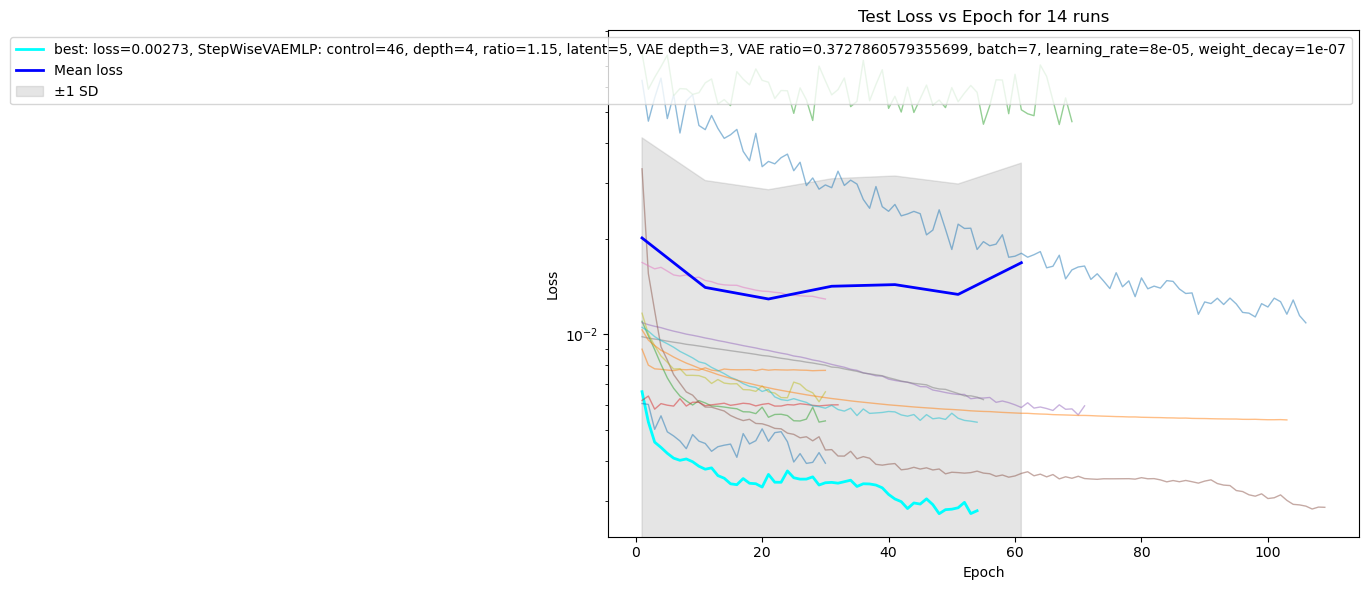




Hyper-Parameter tuning#18

train_model: hyper-parameters=[397, 6.412181881284709e-05, 1e-08, 41, 2, 0.1, 8, 4, 2.595039152897862]
opt_params=[397, 6.412181881284709e-05, 1e-08], model_params=[41, 2, 0.1, 8, 4, 2.595039152897862]
optimiser: batch=7, learning_rate=6e-05, weight_decay=1e-08
encode=[2049, 41]=84,050, decode=[1066, 1024]=1,092,608, total=1,176,658
VAE_layers=[4674, 4404, 3044, 8]
StepWiseMLPAutoEncoder compression: 25.0 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=41, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1066, out_features=1024, bias=True)
  )
)

VAE_layers=[4674, 4404, 3044, 8]
VariationalAutoEncoder compression: 584.2 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList(
    (0): Linear(in_features=4674, out_features=4404, bias=True)
    (1): Linear(in_features=4404, out_features=3044, bias=True)
  )
  (fc_mu): Linear(in_features=3044, out_features=8, bias=True)
  (fc_logvar): Linear(in_features=3044, out_features=8, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=8, out_features=3044, bias=True)
    (1): Linear(in_features=3044, out_features=4404, bias=True)
    (2): Linear(in_features=4404, out_features=4674, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=69,220,418 parameters, exact=69,249,444, error=-0.04%
model: StepWiseVAEMLP: control=41, depth=2, ratio=0.10, latent=8, VAE depth=4, VAE ratio=2.595039152897862
train=80 samples, batch=7 --> 11.4 batches/epoch
total=7 sec, epoch=2 (3.6 sec/epoch), train=0.0076 (-11.33%), test=0.0100 (-9.82%), overfit=1.31
total=14 sec, epoch=4 (3.4 sec/epoch), train=0.0066 (-5.79%), test=0.0088 (-5.88%), overfit=1.33
total=20 sec, epoch=6 (3.3 sec/epoch), train=0.0059 (-6.03%), test=0.0079 (-7.24%), overfit=1.34
total=26 sec, epoch=8 (3.2 sec/epoch), train=0.0052 (-5.43%), test=0.0071 (-6.48%), overfit=1.35
total=32 sec, epoch=10 (3.2 sec/epoch), train=0.0048 (-4.29%), test=0.0062 (-4.84%), overfit=1.29
total=38 sec, epoch=12 (3.2 sec/epoch), train=0.0045 (-3.66%), test=0.0063 (2.62%), overfit=1.41
total=44 sec, epoch=14 (3.2 sec/epoch), train=0.0045 (-1.98%), test=0.0062 (2.05%), overfit=1.38
total=50 sec, epoch=16 (3.2 sec/epoch), train=0.0045 (0.31%), test=0.0061 (0

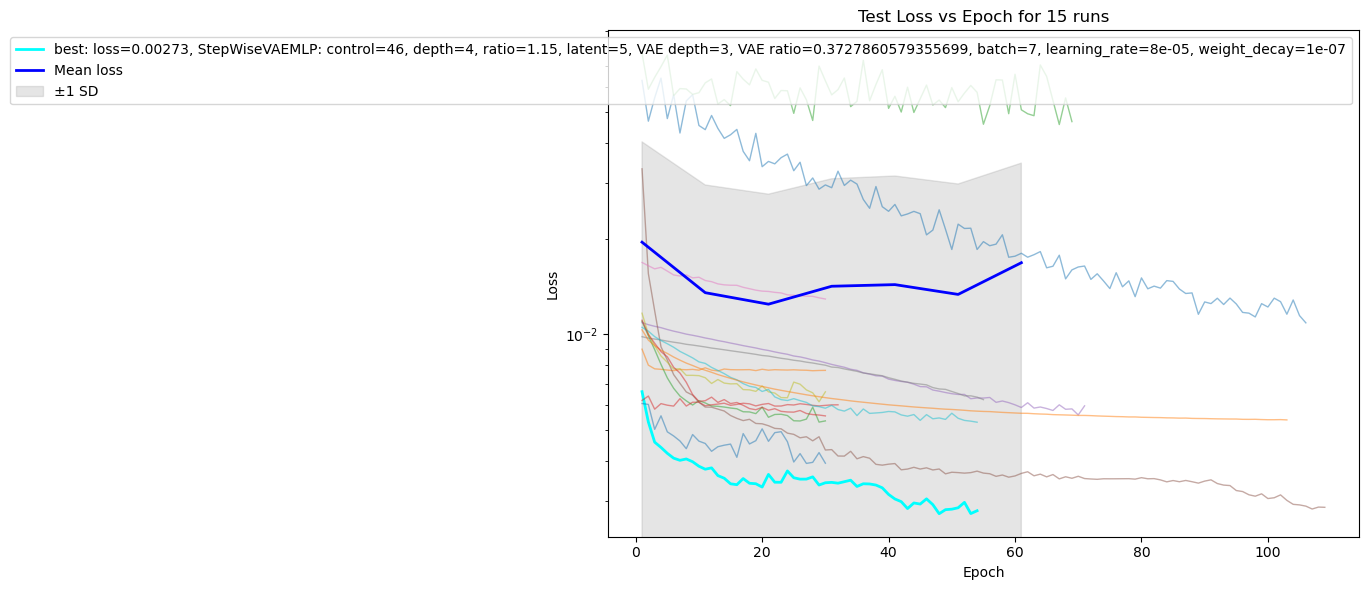




Hyper-Parameter tuning#19

train_model: hyper-parameters=[512, 0.0003065558636326151, 0.0002832497536940504, 50, 4, 0.1, 4, 1, 3.9999958609569273]
opt_params=[512, 0.0003065558636326151, 0.0002832497536940504], model_params=[50, 4, 0.1, 4, 1, 3.9999958609569273]
optimiser: batch=7, learning_rate=0.0003, weight_decay=0.0003
encode=[2049, 257, 129, 50]=566,632, decode=[1075, 1029, 1026, 1024]=3,215,632, total=3,782,264
VAE_layers=[5700, 4]
StepWiseMLPAutoEncoder compression: 20.5 x smaller


StepWiseMLPAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=2049, out_features=257, bias=True)
    (1): ReLU()
    (2): Linear(in_features=257, out_features=129, bias=True)
    (3): ReLU()
    (4): Linear(in_features=129, out_features=50, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1075, out_features=1029, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1029, out_features=1026, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1026, out_features=1024, bias=True)
  )
)

VAE_layers=[5700, 4]
VariationalAutoEncoder compression: 1425.0 x smaller


VariationalAutoEncoder(
  (encoder_layers): ModuleList()
  (fc_mu): Linear(in_features=5700, out_features=4, bias=True)
  (fc_logvar): Linear(in_features=5700, out_features=4, bias=True)
  (decoder_layers): ModuleList(
    (0): Linear(in_features=4, out_features=5700, bias=True)
  )
)

model=StepWiseVAEMLP, approx size=3,827,872 parameters, exact=3,856,372, error=-0.74%
model: StepWiseVAEMLP: control=50, depth=4, ratio=0.10, latent=4, VAE depth=1, VAE ratio=3.9999958609569273
train=80 samples, batch=7 --> 11.4 batches/epoch
total=6 sec, epoch=1 (6.5 sec/epoch), train=0.0061 (0.00%), test=0.0080 (0.00%), overfit=1.32
total=12 sec, epoch=2 (6.0 sec/epoch), train=0.0057 (-5.92%), test=0.0072 (-9.51%), overfit=1.27
total=17 sec, epoch=3 (5.8 sec/epoch), train=0.0055 (-3.79%), test=0.0067 (-6.90%), overfit=1.23
total=23 sec, epoch=4 (5.6 sec/epoch), train=0.0054 (-1.35%), test=0.0067 (-0.67%), overfit=1.24
total=28 sec, epoch=5 (5.6 sec/epoch), train=0.0054 (-0.45%), test=0.0067 (-0.47%), overfit=1.24


In [ ]:
from HyperParameterTuning import *

optimise_hyper_parameters()
#train_best_params()

In [ ]:
# Test every sample and measure the error.
#test_all()


In [ ]:
# Generate some new samples, either by interpolation or randome perturbation
from Generate import *

#generate_morphs()

#generate_variations()

# Create a graph of various encodings: this is how I find out that a small latent layer should be feasible
plot_encodings()

# Generate samples from each variable
#generate_main_encodings()